Dataset Shape: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


C:\Users\User\AppData\Local\Temp\ipykernel_7656\1739872179.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_7656\1739872179.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, palette='magma')


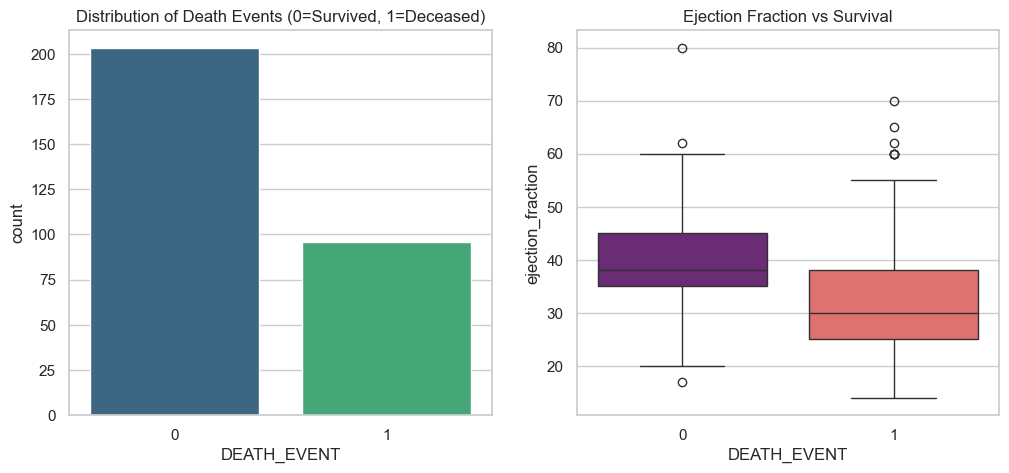

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:15:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.72      0.52      0.60        25

    accuracy                           0.72        60
   macro avg       0.72      0.69      0.69        60
weighted avg       0.72      0.72      0.71        60



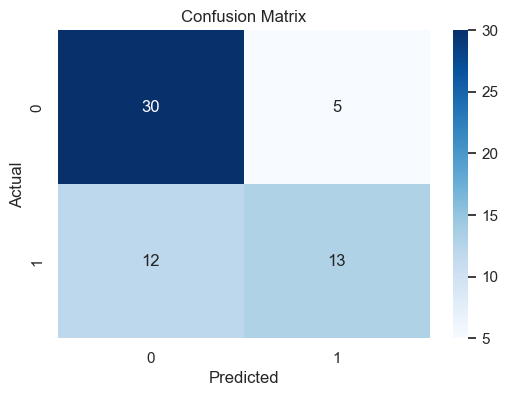


--- Feature Importance (SHAP) ---


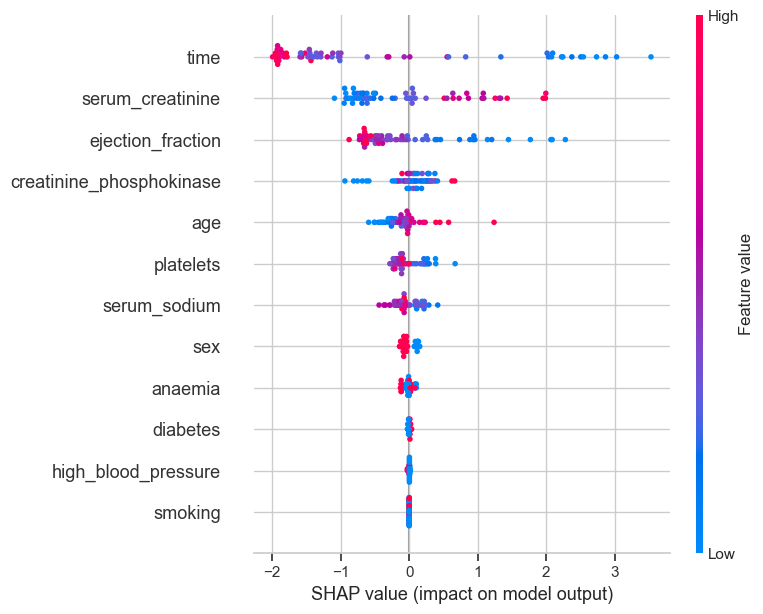

In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set visual style
sns.set(style="whitegrid")
%matplotlib inline

# 2. Load Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.zip')

print(f"Dataset Shape: {df.shape}")
display(df.head())

# 3. Quick Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 5))

# Target distribution
plt.subplot(1, 2, 1)
sns.countplot(x='DEATH_EVENT', data=df, palette='viridis')
plt.title('Distribution of Death Events (0=Survived, 1=Deceased)')

# High-impact feature correlation
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, palette='magma')
plt.title('Ejection Fraction vs Survival')
plt.show()

# 4. Data Preprocessing
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Important for models to weigh clinical units correctly)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training (XGBoost)
model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.05, 
    max_depth=4, 
    use_label_encoder=False, 
    eval_metric='logloss'
)
model.fit(X_train_scaled, y_train)

# 6. Evaluation Results
y_pred = model.predict(X_test_scaled)

print("--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Explainable AI (SHAP) - The "Insight" Phase
# This shows exactly which features are driving the predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

print("\n--- Feature Importance (SHAP) ---")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [2]:
# Install the necessary libraries for the project
!pip install pandas numpy matplotlib seaborn shap xgboost scikit-learn

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   -------------------------------------- 549.1/549.1 kB 236.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? et